In [10]:
import torch
import skimage
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import img_as_float32
import numpy as np
import imageio as iio

In [11]:
im = iio.v3.imread('C:/Users/User/Desktop/projects/Works/Deep Learning exercise/test.jpg') # Load an image
im = img_as_float32(im) # convert image to float in the range [0:1]
# in Torch the image dimensions should be (batch index, channels, rows, columns)
imt = torch.from_numpy(im).permute(2, 0, 1).unsqueeze(0)

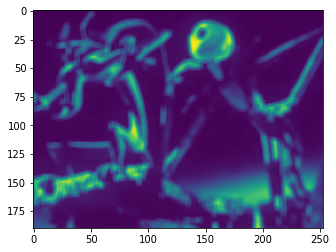

In [18]:
with torch.inference_mode(): # we don't need this line, but it speeds up inference since data is not stored for back-propagation
    w = np.ones((imt.shape[1], 5, 5)) / (imt.shape[1]*5*5) # create a mean-filter
    w = w.astype(np.float32) # convert weights to float32-type
    weight = torch.from_numpy(w).unsqueeze(0) # Convert to PyTorch tensor and make the filter (N, Channels, Rows, Columns)
    result = torch.conv2d(imt, weight) # convolve the image with the filter
    result = result.squeeze(0).permute(1, 2, 0) # remove empty dimension and change dimensions back to (row, columns, channel)
plt.imshow(result.numpy()) # convert image to numpy and display it
plt.show()